Reading the Dataset

In [1]:
from google.colab import files
! pip install kaggle
!mkdir ~/.kaggle
files.upload() #Api key from Kaggle personal account
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir "/content/data/"
%cd "/content/data/"
!kaggle datasets download -d farazrahman/earthquake #https://www.kaggle.com/datasets/farazrahman/earthquake
!unzip "/content/data/earthquake.zip"
!rm "/content/data/earthquake.zip"

Saving kaggle.json to kaggle.json
/content/data
Dataset URL: https://www.kaggle.com/datasets/farazrahman/earthquake
License(s): CC0-1.0
  0% 0.00/467k [00:00<?, ?B/s]
100% 467k/467k [00:00<00:00, 65.5MB/s]
Archive:  /content/data/earthquake.zip
  inflating: all_month.csv           


In [2]:
import pandas as pd
df=pd.read_csv("/content/data/all_month.csv")

DATA PREPROCESSING

1.Dropping Redundant data (net/magSource/locationSource)


2.Dropping rows with explosion/sonic boom/quarry blast

3.Dropping rows with Nan

4.Dropping id,updated columns

5.Turning negative values in the target vector to positive values

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-11-27T02:22:08.130Z,38.787167,-122.769333,2.09,0.91,md,13.0,82.0,0.015400,0.02,...,2024-11-27T02:23:43.207Z,"2 km NW of The Geysers, CA",earthquake,0.28,0.57,0.200,13.0,automatic,nc,nc
1,2024-11-27T02:16:31.660Z,38.810665,-122.777832,0.34,0.43,md,5.0,108.0,0.003417,0.01,...,2024-11-27T02:18:07.467Z,"4 km NNW of The Geysers, CA",earthquake,1.18,0.73,0.150,4.0,automatic,nc,nc
2,2024-11-27T02:03:19.844Z,61.299600,-150.726600,55.20,1.40,ml,NaN,NaN,NaN,0.25,...,2024-11-27T02:05:04.429Z,"26 km NE of Beluga, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
3,2024-11-27T02:01:31.640Z,19.383499,-155.244995,1.89,2.11,md,21.0,78.0,0.006288,0.20,...,2024-11-27T02:03:01.160Z,"6 km S of Volcano, Hawaii",earthquake,0.34,0.25,0.370,20.0,automatic,hv,hv
4,2024-11-27T02:00:13.420Z,33.479500,-116.510833,12.74,0.70,ml,24.0,91.0,0.077850,0.13,...,2024-11-27T02:04:32.767Z,"17 km ESE of Anza, CA",earthquake,0.24,0.45,0.112,18.0,automatic,ci,ci


In [4]:
df.shape

(7576, 22)

In [5]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

net,locationSource,magSource have same values/redundant data.So dropping 2 of columns eliminating redundancy.

In [6]:
print(df['net'].unique())
print(df['locationSource'].unique())
print(df['magSource'].unique())

['nc' 'ak' 'hv' 'ci' 'nn' 'tx' 'us' 'pr' 'mb' 'uu' 'uw' 'av' 'ok' 'nm'
 'se']
['nc' 'ak' 'hv' 'ci' 'nn' 'tx' 'us' 'pr' 'mb' 'uu' 'uw' 'av' 'ok' 'nm'
 'se']
['nc' 'ak' 'hv' 'ci' 'nn' 'tx' 'us' 'pr' 'mb' 'uu' 'uw' 'av' 'ok' 'nm'
 'se']


In [7]:
df=df.drop('net',axis=1)                       #While we use drop() either assign back to df
df.drop('locationSource',axis=1,inplace=True)  #or use inplace=True to avoid other references to dataset

In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status,magSource
0,2024-11-27T02:22:08.130Z,38.787167,-122.769333,2.09,0.91,md,13.0,82.0,0.015400,0.02,nc75090911,2024-11-27T02:23:43.207Z,"2 km NW of The Geysers, CA",earthquake,0.28,0.57,0.200,13.0,automatic,nc
1,2024-11-27T02:16:31.660Z,38.810665,-122.777832,0.34,0.43,md,5.0,108.0,0.003417,0.01,nc75090906,2024-11-27T02:18:07.467Z,"4 km NNW of The Geysers, CA",earthquake,1.18,0.73,0.150,4.0,automatic,nc
2,2024-11-27T02:03:19.844Z,61.299600,-150.726600,55.20,1.40,ml,NaN,NaN,NaN,0.25,ak024f93mru8,2024-11-27T02:05:04.429Z,"26 km NE of Beluga, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak
3,2024-11-27T02:01:31.640Z,19.383499,-155.244995,1.89,2.11,md,21.0,78.0,0.006288,0.20,hv74542547,2024-11-27T02:03:01.160Z,"6 km S of Volcano, Hawaii",earthquake,0.34,0.25,0.370,20.0,automatic,hv
4,2024-11-27T02:00:13.420Z,33.479500,-116.510833,12.74,0.70,ml,24.0,91.0,0.077850,0.13,ci40988080,2024-11-27T02:04:32.767Z,"17 km ESE of Anza, CA",earthquake,0.24,0.45,0.112,18.0,automatic,ci


In [9]:
print(df['type'].unique())
earthquake_df = df[df['type'] == 'earthquake']
explosion_df = df[df['type'] == 'explosion']
quarry_blast_df = df[df['type'] == 'quarry blast']
sonic_boom_df = df[df['type'] == 'sonic boom']
print('Size of Earthquake dataset: '+str(earthquake_df.shape))
print('Size of explosion dataset: '+str(explosion_df.shape)) #
print('Size of quarry blast dataset: '+str(quarry_blast_df.shape)) #
print('Size of sonic boom dataset: '+str(sonic_boom_df.shape))#

df = df.drop(df[df['type'] == 'explosion'].index)
df = df.drop(df[df['type'] == 'quarry blast'].index)
df = df.drop(df[df['type'] == 'sonic boom'].index)
print('Size of dataset after dropping dataset with explosion/quarryblast/sonic boom: '+str(df.shape))

['earthquake' 'explosion' 'quarry blast' 'sonic boom']
Size of Earthquake dataset: (7425, 20)
Size of explosion dataset: (35, 20)
Size of quarry blast dataset: (114, 20)
Size of sonic boom dataset: (2, 20)
Size of dataset after dropping dataset with explosion/quarryblast/sonic boom: (7425, 20)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7425 entries, 0 to 7575
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7425 non-null   object 
 1   latitude         7425 non-null   float64
 2   longitude        7425 non-null   float64
 3   depth            7425 non-null   float64
 4   mag              7425 non-null   float64
 5   magType          7425 non-null   object 
 6   nst              6340 non-null   float64
 7   gap              6340 non-null   float64
 8   dmin             6332 non-null   float64
 9   rms              7425 non-null   float64
 10  id               7425 non-null   object 
 11  updated          7425 non-null   object 
 12  place            7425 non-null   object 
 13  type             7425 non-null   object 
 14  horizontalError  5875 non-null   float64
 15  depthError       7425 non-null   float64
 16  magError         6318 non-null   float64
 17  magNst           63

In [11]:
df['magType'].unique()

array(['md', 'ml', 'mb', 'mww', 'mwr', 'mh', 'mb_lg', 'mw'], dtype=object)

In [12]:
print(df['updated'].unique())#delete
print(df['nst'].unique())#
print(df['id'].unique())#delete
print(df['place'].unique())
print(df['status'].unique())
print(df['magNst'].unique())

['2024-11-27T02:23:43.207Z' '2024-11-27T02:18:07.467Z'
 '2024-11-27T02:05:04.429Z' ... '2024-10-28T13:38:45.340Z'
 '2024-10-28T13:41:36.479Z' '2024-10-28T02:55:10.560Z']
[ 13.   5.  nan  21.  24.  23.   6.  57.  12.  10.  28.  16.  59.  39.
   8.   9.  11.  62.  27.  18.  29. 119.  47.  80.  32.  31.  20.  26.
  17.  15.  99.  22.  63.  19.  37.  40.  30.  14.  61.  94.  60.  45.
  43. 276.   7.  33.  97.  44.  42.  25.  46.  54.   4.  90.  65.  35.
  58.   3.  56.  48.  73.  79.  86.  38.  75.  55.  69.  36.  49.  51.
  41.  68.  70. 172.  50. 110.  52.  89.  83.  76.  74.  53.  84.  67.
 105.  91. 107.  34.  77. 111.  82.  64. 112. 136.  85.  95.  71.  98.
 130. 122. 149. 121.  66.  81.  93. 118.  92.  72. 100. 104.  96. 123.
 127. 109. 131. 154. 167.  88.  87. 164. 103. 220. 298. 221.  78. 102.
 174. 263. 106. 108. 185. 126. 140. 208. 113. 114. 146. 199. 171. 237.
   0. 158. 124. 295. 128.]
['nc75090911' 'nc75090906' 'ak024f93mru8' ... 'ci40965944' 'tx2024vedl'
 'pr71463898']
['2 km

In [13]:
df.drop('id',axis=1,inplace=True)
df.drop('updated',axis=1,inplace=True)

In [14]:
# Check if any NaN values exist in the entire DataFrame
if df.isna().any().any():
    print("NaN values exist in the DataFrame.")
else:
    print("No NaN values in the DataFrame.")

NaN values exist in the DataFrame.


In [15]:
if df['latitude'].isna().any():
    print("NaN values exist in the latitude column.")
if df['longitude'].isna().any():
    print("NaN values exist in the longitude column.")
if df['depth'].isna().any():
    print("NaN values exist in the depth column.")
if df['mag'].isna().any():
    print("NaN values exist in the mag column.")
if df['magType'].isna().any():
    print("NaN values exist in the magType column.")
if df['nst'].isna().any():
    print("NaN values exist in the nst column.")
if df['gap'].isna().any():
    print("NaN values exist in the gap column.")
if df['dmin'].isna().any():
    print("NaN values exist in the dmin column.")
if df['rms'].isna().any():
    print("NaN values exist in the rms column.")
if df['place'].isna().any():
    print("NaN values exist in the place column.")
if df['type'].isna().any():
    print("NaN values exist in the type column.")
if df['status'].isna().any():
    print("NaN values exist in the status column.")
if df['horizontalError'].isna().any():
    print("NaN values exist in the horizontalError column.")
if df['depthError'].isna().any():
    print("NaN values exist in the depthError column.")
if df['magError'].isna().any():
    print("NaN values exist in the magError column.")
if df['magNst'].isna().any():
    print("NaN values exist in the magNst column.")


NaN values exist in the nst column.
NaN values exist in the gap column.
NaN values exist in the dmin column.
NaN values exist in the horizontalError column.
NaN values exist in the magError column.
NaN values exist in the magNst column.


In [16]:
print('Before dropping dataset with NaN values:'+str(df.shape))
df.dropna(inplace=True)#dropping Nan rows
print('After dropping dataset with NaN values:'+str(df.shape))





Before dropping dataset with NaN values:(7425, 18)
After dropping dataset with NaN values:(5845, 18)


In [17]:
# Swapping all negative values with 0 because the negative values has no significance as magnitude value and to avoid calculation value error that may impact rmse/nrmse
#NRMSE to be calculated after train/test models

for index, row in df.iterrows():
    if row['mag'] < 0:
        df.at[index, 'mag'] = 0

df.sort_values(by=['mag'],ascending=False)

average_magError = df['magError'].mean()
print("Average magError (calculated using Pandas):", average_magError)

Average magError (calculated using Pandas): 0.1756881842677498


**FeatureSelection**

In [18]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,type,horizontalError,depthError,magError,magNst,status,magSource
0,2024-11-27T02:22:08.130Z,38.787167,-122.769333,2.09,0.91,md,13.0,82.0,0.015400,0.02,"2 km NW of The Geysers, CA",earthquake,0.28,0.57,0.200,13.0,automatic,nc
1,2024-11-27T02:16:31.660Z,38.810665,-122.777832,0.34,0.43,md,5.0,108.0,0.003417,0.01,"4 km NNW of The Geysers, CA",earthquake,1.18,0.73,0.150,4.0,automatic,nc
3,2024-11-27T02:01:31.640Z,19.383499,-155.244995,1.89,2.11,md,21.0,78.0,0.006288,0.20,"6 km S of Volcano, Hawaii",earthquake,0.34,0.25,0.370,20.0,automatic,hv
4,2024-11-27T02:00:13.420Z,33.479500,-116.510833,12.74,0.70,ml,24.0,91.0,0.077850,0.13,"17 km ESE of Anza, CA",earthquake,0.24,0.45,0.112,18.0,automatic,ci
5,2024-11-27T01:36:15.440Z,19.380167,-155.242340,2.17,1.84,ml,23.0,67.0,0.006765,0.24,"6 km S of Volcano, Hawaii",earthquake,0.37,0.29,0.360,12.0,automatic,hv


In [19]:
#Pearson Coorelation coefficient

numerical_cols = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_cols.corr()

mag_correlations = correlation_matrix['mag'].sort_values(ascending=False)

print(mag_correlations)

mag                1.000000
rms                0.775614
horizontalError    0.748656
longitude          0.606617
nst                0.535512
dmin               0.498978
depth              0.447729
magNst             0.438054
depthError         0.351141
gap               -0.038049
magError          -0.297206
latitude          -0.709584
Name: mag, dtype: float64


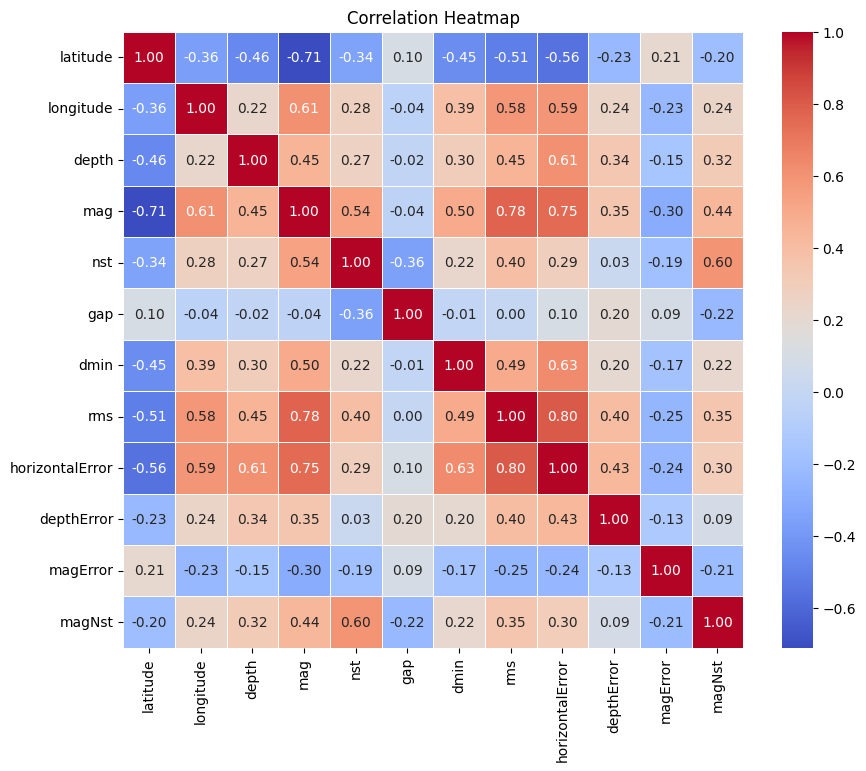

In [20]:
#Finding corelation among features
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
                   'horizontalError', 'depthError', 'magError', 'magNst']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [21]:
print('magnst is subset of nst.NST refers to the stations that recored seismic data.\nMagnst refers to the staions whose data is actually considered for calculating earthquake magnitude ')
print('Azimuthal gap is the radian angle between two nearest stations.nst/magnst is important for accurate mag calculation.')
print('dmin-the lower its value,the accurate the estimations of stations ')

magnst is subset of nst.NST refers to the stations that recored seismic data.
Magnst refers to the staions whose data is actually considered for calculating earthquake magnitude 
Azimuthal gap is the radian angle between two nearest stations.nst/magnst is important for accurate mag calculation.
dmin-the lower its value,the accurate the estimations of stations 


In [22]:
df = df[df['mag'] != 0]

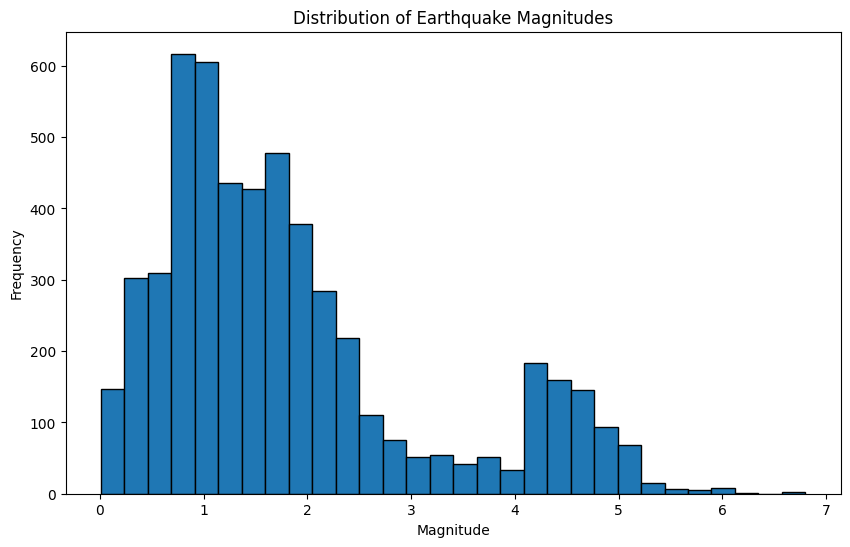

In [23]:

import pandas as pd
import matplotlib.pyplot as plt



# Ensure the 'time' column is in datetime format for time-based visualizations
df['time'] = pd.to_datetime(df['time'])

# Visualization 1: Magnitude Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['mag'], bins=30, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()